# Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from datetime import datetime
import statsmodels.api as sm
import folium
import plotly.express as px
import plotly.io as pio


# Read the crime dataset, already cleaned

In [2]:
crimes = pd.read_csv('clean_data/crime_clean.csv', index_col=0, low_memory=False)
crimes.head()

,crime,gender,boro,age,age_victim,race,Latitude,Longitude,year,month,day
0,ROBBERY,F,MANHATTAN,25-44,M,BLACK HISPANIC,40.724200,-73.977226,2019,September,30
1,CRIMINAL MISCHIEF & RELATED OF,F,QUEENS,18-24,M,BLACK,40.689974,-73.796769,2019,September,30
2,INTOXICATED & IMPAIRED DRIVING,M,STATEN ISLAND,18-24,M,WHITE,40.606129,-74.076570,2019,September,30
3,ROBBERY,F,STATEN ISLAND,25-44,M,WHITE HISPANIC,40.645023,-74.077217,2019,September,30
4,ROBBERY,F,QUEENS,18-24,M,ASIAN / PACIFIC ISLANDER,40.684266,-73.815138,2019,September,30


# Read the boro's population dataset, already cleaned

In [3]:
pop = pd.read_csv('clean_data/population_clean.csv', index_col=0)
pop

,boro,population,percentage
1,Bronx,1446788,16.92%
2,Brooklyn,2648452,30.97%
3,Manhattan,1638281,19.16%
4,Queens,2330295,27.25%
5,Staten Island,487155,5.7%


## Localize the Maximum and Minum crime as function of the boro.

In [4]:
crimeevent = crimes.groupby(['year','crime','boro'],as_index = False).count()[['year','boro','day','crime']]
crimeevent = crimeevent.rename(columns={'day':'ocurrences'})
crimeevent.head()

,year,boro,ocurrences,crime
0,2019,BRONX,66,ADMINISTRATIVE CODE
1,2019,BROOKLYN,350,ADMINISTRATIVE CODE
2,2019,MANHATTAN,28,ADMINISTRATIVE CODE
3,2019,QUEENS,90,ADMINISTRATIVE CODE
4,2019,STATEN ISLAND,3,ADMINISTRATIVE CODE


In [5]:
boro = crimeevent.boro.unique()
maxs = pd.DataFrame()
mins = pd.DataFrame()


for item in boro:
        maxs = maxs.append(crimeevent.loc[(crimeevent.boro == item)].max(),ignore_index = True)
        
        mins = mins.append(crimeevent.loc[(crimeevent.boro == item)].min(),ignore_index = True)
print(f'''
table of max: 

{maxs}


table of min: 

{mins}
''')


table of max: 

            boro                     crime  ocurrences    year
0          BRONX  VEHICLE AND TRAFFIC LAWS      7060.0  2019.0
1       BROOKLYN  VEHICLE AND TRAFFIC LAWS      6346.0  2019.0
2      MANHATTAN  VEHICLE AND TRAFFIC LAWS      6628.0  2019.0
3         QUEENS  VEHICLE AND TRAFFIC LAWS      5534.0  2019.0
4  STATEN ISLAND  VEHICLE AND TRAFFIC LAWS       924.0  2019.0


table of min: 

            boro                crime  ocurrences    year
0          BRONX  ADMINISTRATIVE CODE         1.0  2019.0
1       BROOKLYN  ADMINISTRATIVE CODE         1.0  2019.0
2      MANHATTAN  ADMINISTRATIVE CODE         1.0  2019.0
3         QUEENS  ADMINISTRATIVE CODE         1.0  2019.0
4  STATEN ISLAND  ADMINISTRATIVE CODE         1.0  2019.0



#  Different plots showing the number of crimes as function of:

# 1. Boro

# 2. Ethnicity

# 3. Range Age

# Number of crimes by Ethnicity

In [71]:
ethnicity = crimes.groupby(['race'],as_index= False).count()[['race','day']]
ethnicity = ethnicity.rename(columns={'day':'ocurrences','race':'ethnicity'})
ethnicity.sort_values('ocurrences',ascending= False,inplace=True)



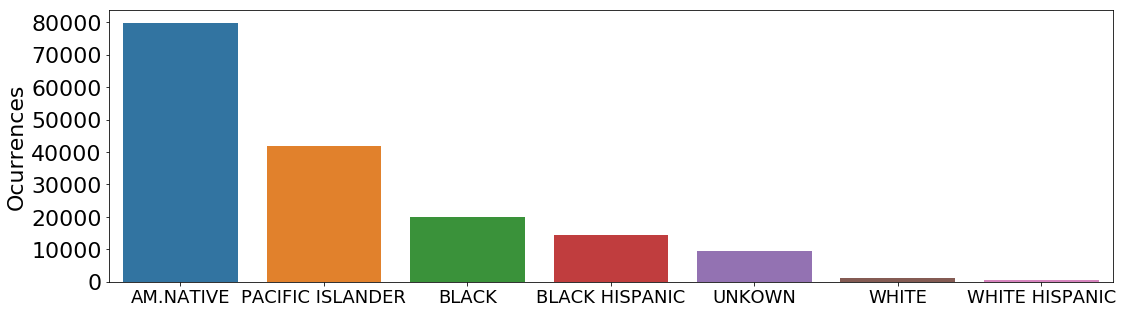

In [73]:
f, ax = plt.subplots(1,1,figsize=(18,5), sharey= True)
sns.barplot(ethnicity.ethnicity, ethnicity.ocurrences)
plt.xticks(np.arange(7), ('AM.NATIVE', 'PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'UNKOWN','WHITE','WHITE HISPANIC'),fontsize  =18)
plt.yticks(fontsize  =22)
plt.xlabel('')
plt.ylabel('Ocurrences', fontsize=22)

plt.show()

# Define a function to remove the attribut column name in the legend

In [80]:
def create_generator(parameter):
    for continent in parameter:
        yield continent
continents = create_generator(ethnicity.ethnicity.tolist())

In [81]:
fig= px.bar(ethnicity,'ethnicity', 'ocurrences',color='ethnicity',width=1000, height=500,orientation = 'v',labels={'ocurrences':'number of crimes'},title ="Crimes as function of ethnicity",)

fig.for_each_trace(
    lambda trace: trace.update(name=next(continents)),
)

fig.update_xaxes(title='ETHNICITY')

fig.show()


# Number of crimes by Age


In [9]:
age = crimes.groupby(['age'],as_index= False).count()[['age','day']]
age = age.rename(columns={'day':'ocurrences'})
age



,age,ocurrences
0,18-24,34151
1,25-44,88810
2,45-64,33612
3,65+,2325
4,<18,7988


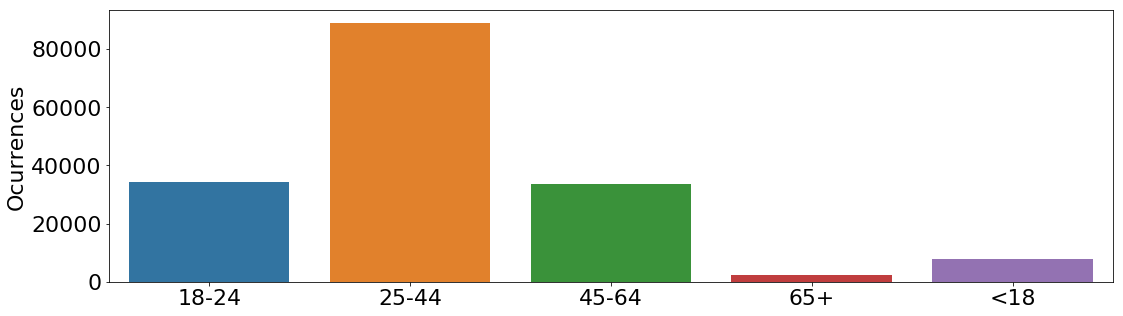

In [10]:
f, ax = plt.subplots(1,1,figsize=(18,5), sharey= True)
sns.barplot(age.age, age.ocurrences)
plt.xticks(fontsize  =22)
plt.yticks(fontsize  =22)
plt.xlabel('')
plt.ylabel('Ocurrences', fontsize=22)

plt.show()

In [52]:
def create_generator(parameter):
    for continent in parameter:
        yield continent
continents = create_generator(age.age.tolist())

In [53]:
fig = px.bar(age,'age', 'ocurrences',color='age',width=980, height=500,orientation = 'v',labels={'ocurrences':'number of crimes'},title ="Crimes as function of age range",)

fig.for_each_trace(
    lambda trace: trace.update(name=next(continents)),
)

fig.show()

# Number of crimes by Boro

In [12]:
boro = crimes.groupby(['boro'],as_index= False).count()[['boro','day']]
boro = boro.rename(columns={'day':'ocurrences'})
boro.sort_values('ocurrences',ascending= False,inplace=True)
boro


,boro,ocurrences
1,BROOKLYN,45673
2,MANHATTAN,41299
0,BRONX,38100
3,QUEENS,34688
4,STATEN ISLAND,7126


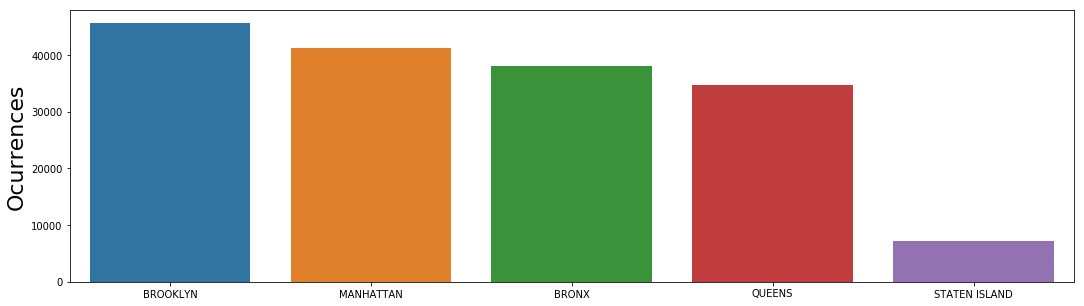

In [13]:
f, ax = plt.subplots(1,1,figsize=(18,5), sharey= True)
sns.barplot(boro.boro, boro.ocurrences)
#plt.xticks(np.arange(5), ('BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'),fontsize  =22)
plt.xlabel('')
plt.ylabel('Ocurrences', fontsize=22)

plt.show()

In [66]:
def create_generator(parameter):
    for continent in parameter:
        yield continent
continents = create_generator(boro.boro.tolist())

In [67]:
fig = px.bar(boro,'boro', 'ocurrences',width=1000, height=550,orientation = 'v', labels={'ocurrences':'number of crimes'},title ="Crimes number for boros", color='boro')


fig.for_each_trace(
    lambda trace: trace.update(name=next(continents)),
)

fig.update_xaxes(title='BORO')


fig.show()

# Relative  percentage of criminality by boro

## It is similar than number of crimes by boro, but here we take into account the population of each boro, which give us more precission

## Clean and sort the crimes dataset


In [15]:
crimeboro = crimes.groupby(['boro'],as_index = False).count()[['boro','day']]
crimeboro = crimeboro.rename(columns={'day':'ocurrences'})
crimeboro.sort_values('boro',ascending= True)

,boro,ocurrences
0,BRONX,38100
1,BROOKLYN,45673
2,MANHATTAN,41299
3,QUEENS,34688
4,STATEN ISLAND,7126


## Concate the population dataset (population) in the crime dataset


In [16]:
pop.reset_index(drop=True,inplace=True)
pop.head()

,boro,population,percentage
0,Bronx,1446788,16.92%
1,Brooklyn,2648452,30.97%
2,Manhattan,1638281,19.16%
3,Queens,2330295,27.25%
4,Staten Island,487155,5.7%


In [17]:
crimeboro['population'] = pop.population
crimeboro['boro']=pop.boro
crimeboro['crime_boro'] = crimeboro.ocurrences/crimeboro.population*100
crimeboro.sort_values('crime_boro',ascending= False,inplace=True)
crimeboro.head()

,boro,ocurrences,population,crime_boro
0,Bronx,38100,1446788,2.633420
2,Manhattan,41299,1638281,2.520874
1,Brooklyn,45673,2648452,1.724517
3,Queens,34688,2330295,1.488567
4,Staten Island,7126,487155,1.462779


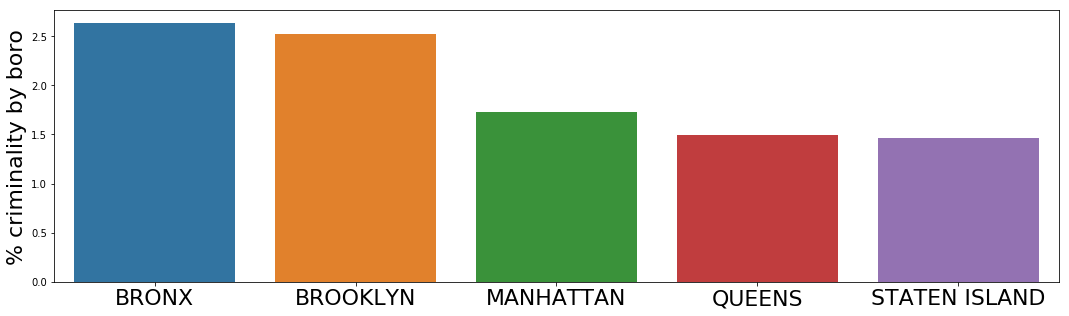

In [18]:
f, ax = plt.subplots(1,1,figsize=(18,5), sharey= True)
sns.barplot(crimeboro.boro, crimeboro.crime_boro)
plt.xticks(np.arange(5), ('BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'),fontsize  =22)
plt.xlabel('')
plt.ylabel('% criminality by boro', fontsize=22)

plt.show()

In [56]:
def create_generator(parameter):
    for continent in parameter:
        yield continent
continents = create_generator(crimeboro.boro.tolist())

In [57]:
fig = px.bar(crimeboro,'boro', 'crime_boro',width=1000, height=570,orientation = 'v',color='boro',labels={'crime_boro':'index crime by population'},title ="Criminality ratio by boro's population")


fig.for_each_trace(
    lambda trace: trace.update(name=next(continents)),
)


fig.show()

#crimeboro.iplot(kind='barchart',xtitle = 'boro')

# Number of crimes by Gender


In [20]:
gender = crimes.groupby(['gender'],as_index= False).count()[['gender','day']]
gender = gender.rename(columns={'day':'ocurrences'})
gender

,gender,ocurrences
0,F,64199
1,I,358
2,M,99984
3,V,2345


In [21]:
gender.drop([1,3],inplace=True)
gender.reset_index(drop=True, inplace=True)

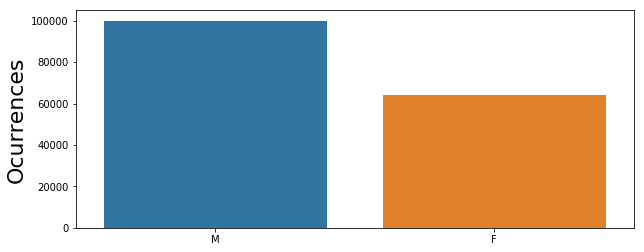

In [22]:
gender.sort_values('ocurrences',ascending= False,inplace=True)
f, ax = plt.subplots(1,1,figsize=(10,4), sharey= True)
sns.barplot(gender.gender, gender.ocurrences)
#plt.xticks(np.arange(2), ('BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'),fontsize  =22)
plt.xlabel('')
plt.ylabel('Ocurrences', fontsize=22)

plt.show()

In [60]:
def create_generator(parameter):
    for continent in parameter:
        yield continent
continents = create_generator(gender.gender.tolist())

In [61]:
fig = px.bar(gender,'gender', 'ocurrences', width=600, height=450, color='gender')

fig.for_each_trace(
    lambda trace: trace.update(name=next(continents)),
)


fig.show()

# Barplot for the 10 TOP crimes 

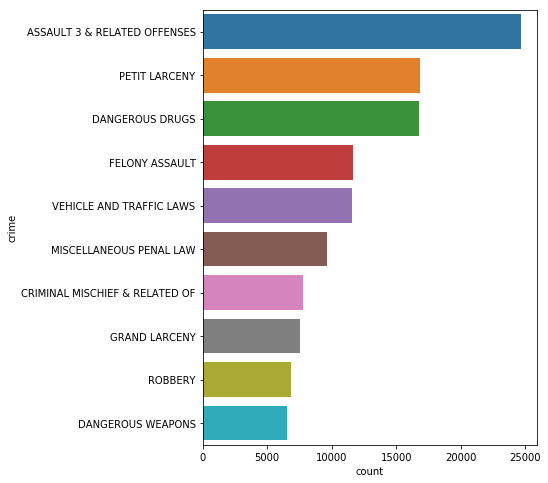

In [24]:
f, ax = plt.subplots(1,1,figsize=(6,8), sharey= True)
sns.countplot(data=crimes, y='crime', order=crimes.crime.value_counts()[:10].index )
plt.savefig('images/crimes.png')
plt.show()


# Creation of an interactive MAP of NYC showing the TOP10 crimes more commited.

### Creation of dataframe 'maps' to gather the day information which will be as number of crimes

In [25]:
maps = crimes.groupby(['year','boro','age','race'],as_index = False).count()[['day']]
maps = maps.rename(columns={'day':'ocurrences'})
maps.head()


,ocurrences
0,13
1,100
2,3688
3,1685
4,61


### Concate the latitud, longitud and kind of crime to the maps dataset to draw the interactive map.

In [26]:
maps['Latitude'] = crimes['Latitude']
maps['Longitude'] = crimes['Longitude']
maps['crime']= crimes['crime']
maps.sort_values('ocurrences',ascending= False,inplace= True)
maps = maps.nlargest(10,'ocurrences',keep='first')

maps.head()

,ocurrences,Latitude,Longitude,crime
44,13652,40.634542,-73.939173,OFFENSES AGAINST PUBLIC ADMINI
78,9755,40.648650,-73.950336,RAPE
9,9006,40.821702,-73.860657,ASSAULT 3 & RELATED OFFENSES
113,6952,40.666523,-73.898358,MISCELLANEOUS PENAL LAW
13,6720,40.670655,-73.913391,SEX CRIMES


In [63]:
def create_generator(parameter):
    for continent in parameter:
        yield continent
continents = create_generator(maps.crime.tolist())

In [64]:
from token_mapbox import key
px.set_mapbox_access_token(key)
fig = px.scatter_mapbox(maps, lat="Latitude", lon="Longitude",color='crime', size='ocurrences',
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)

fig.for_each_trace(
    lambda trace: trace.update(name=next(continents)),
)


fig.show()
